## Latar Belakang ##


PT Transportasi Jakarta (Transjakarta) adalah Badan Usaha Milik Daerah (BUMD) DKI Jakarta yang mengelola sistem Bus Rapid Transit (BRT). Perusahaan ini menyediakan transportasi massal aman, cepat, dan terjangkau di jalur khusus untuk mengurangi kemacetan dengan jangkauan luas. 

Perusahaan ingin melakukan efisiensi dan menyelsaikan permasalahn terkait inefisiensi pada koridor Kampung Rambutan - Blok M.

Transajakarta

In [595]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Kategori,Nama Kolom,Deskripsi Singkat
Identitas,transID,ID unik untuk setiap transaksi.
1. payCardID: ID kartu pelanggan (identitas utama).
2. payCardBank: Nama bank penerbit kartu.
3. payCardName: Nama pelanggan pada kartu.
4. payCardSex: Jenis kelamin pelanggan.
5. payCardBirthDate: Tahun lahir pelanggan.
6. corridorID: ID Koridor / ID Rute.
7. corridorName: Nama Rute (Titik Awal - Titik Akhir).
8. direction: "Arah perjalanan (0: Pergi, 1: Kembali)."
9. tapInStops: ID Halte keberangkatan (Tap In).
10. tapInStopsName: Nama Halte keberangkatan.
11. tapInStopsLat/Lon: Koordinat lokasi Halte Tap In.
12. stopStartSeq: Urutan halte saat mulai perjalanan.
13. tapInTime: Tanggal dan waktu masuk (Tap In).
14. tapOutStops: ID Halte tujuan (Tap Out).
15. tapOutStopsName: Nama Halte tujuan.
16. tapOutStopsLat/Lon: Koordinat lokasi Halte Tap Out.
17. stopEndSeq: Urutan halte saat selesai perjalanan.
18. tapOutTime: Tanggal dan waktu keluar (Tap Out).
19. payAmount: Tarif yang dibayar (Beberapa bernilai 0/Gratis).



## **Data Understanding and Data Cleaning** ##

In [596]:
df=pd.read_csv('Transjakarta (1).csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [597]:
df.dropna(subset=['tapOutTime'])

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [598]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum()) # Cek kolom mana yang banyak kosong


=== MISSING VALUES ===
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [599]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [600]:
# Isi payAmount kosong dengan nilai yang paling sering muncul di koridor tersebut
df['payAmount'] = df.groupby('corridorName')['payAmount'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 3500))


In [601]:
# Hapus baris yang tidak punya tapOutTime karena durasi tidak bisa dihitung
df.dropna(subset=['tapOutTime'], inplace=True)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [602]:
#Menghapus data duplikat pada trans id
df_clean = df.drop_duplicates(subset=['transID'])

In [603]:
# 1. Konversi Kolom Waktu 
# Mengubah string menjadi format datetime agar bisa dihitung durasinya
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [604]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,3.655600e+04,36556.000000,36556.000000,36556.000000,36556.000000,36556.000000,36556,36556.000000,36556.000000,36556.000000,36556,34702.000000
mean,4.238655e+17,1990.129500,0.500602,-6.214851,106.841533,13.565242,2023-04-16 08:07:37.172557312,-6.214651,106.841233,21.219909,2023-04-16 09:19:44.697997568,2726.816898
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,1.800407e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:53.249999872,-6.247225,106.801750,11.000000,2023-04-10 10:18:06.249999872,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:41:12,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,4.693230e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,2023-04-21 21:52:38.500000,-6.174736,106.883030,29.000000,2023-04-21 23:26:00.249999872,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000
std,1.320020e+18,13.039914,0.500006,0.057871,0.060367,12.231801,NaN,0.059022,0.060999,13.800689,NaN,4165.647462


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,36556,36556,36556,36556,35351,34702,35379,36556,35611,36556
unique,36556,6,1981,2,221,216,2537,2567,2230,2248
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,18058,79,19469,384,375,228,235,306,316


In [605]:
#Membuat Kolom Baru: Durasi Perjalanan (dalam Menit)
df['duration_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60


In [606]:
# Filter data sampah (durasi < 1 menit atau > 4 jam)
df_clean = df[(df['duration_minutes'] > 1) & (df['duration_minutes'] < 240)].copy()

In [607]:
# Kolom data null pada paycardsex diganti dengan "unknown"
df['payCardSex'] = df['payCardSex'].fillna('Unknown')

In [608]:
# 3. HANDLING MISSING VALUES
# Kita hapus baris yang tidak punya tapOutTime karena ini transaksi 'error/gantung'
df.dropna(subset=['tapOutTime', 'tapOutStopsName'],inplace=True)

In [609]:
# Hitung usia penumpang (Asumsi tahun sekarang 2023)
df['age'] = 2023 - df['payCardBirthDate']


In [610]:
# Menghilangkan spasi liar dan merapikan huruf kapital
text_cols = ['payCardName', 'tapInStopsName', 'tapOutStopsName', 'corridorName']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()



In [611]:
# Filter: Hanya ambil umur 5 - 60 tahun (menghapus outlier umur 0 atau 100+)
df_clean = df[(df['age'] >= 18) & (df['age'] <= 60)]


In [612]:
# Filter Urutan Halte 
# Secara umum, stopEndSeq harus lebih besar dari stopStartSeq
df_clean = df_clean[df_clean['stopEndSeq'] > df_clean['stopStartSeq']]

In [613]:
top_10_stasiun = df['tapInStopsName'].value_counts().head(5)
df


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration_minutes,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet Via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 Via Pik,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - Mh Thamrin Via Semanggi,1.0,P00261,...,2023-04-21 18:18:37,P00228,Smk 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,97.200000,19
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,35.850000,49
37897,YXPP627N4G95HO,213159426675861,emoney,Drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,177.633333,47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 19:59:26,B01787P,Jpo Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,28.400000,47


In [614]:
#Mengambil nama kolom tapInTime
df["day_name"] = df["tapInTime"].dt.day_name()


## Deteksi Data Outlier Menggunakan Boxplot ##

In [615]:
#Mendeteksi Data Outlier
Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration_minutes'] < lower_bound) | (df['duration_minutes'] > upper_bound)]

print(f"Batas bawah durasi: {lower_bound:.2f} menit")
print(f"Batas atas durasi: {upper_bound:.2f} menit")
print(f"Jumlah data outlier terdeteksi: {len(outliers)} baris")

Batas bawah durasi: -15.87 menit
Batas atas durasi: 162.80 menit
Jumlah data outlier terdeteksi: 39 baris


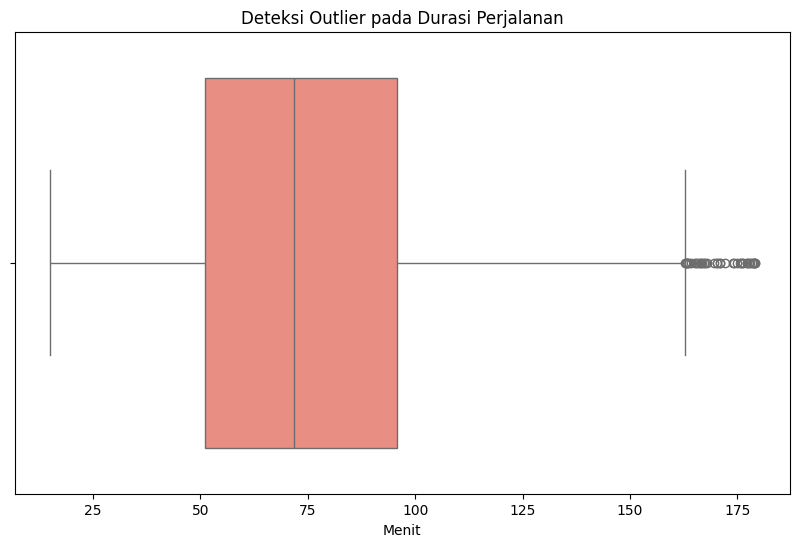

In [616]:
#Deteksi outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration_minutes'], color='salmon')
plt.title('Deteksi Outlier pada Durasi Perjalanan')
plt.xlabel('Menit')
plt.show()

## Analisa Efisiensi 

Analisa Selisih Waktu (Travel Time Variability): Rute yang memiliki perbedaan durasi sangat jauh antara Jam Sibuk dan Jam Biasa adalah rute yang tidak efisien secara waktu. Contohnya rute Rusun Marunda, di mana bus terjebak macet tanpa jalur steril. Ini menyebabkan penggunaan bahan bakar tinggi namun produktivitas bus rendah.

Berdasarkan perbandingan waktu yang drastis tadi, rute yang kurang efisien adalah rute yang memiliki "High Delay,Waktu tempuh lama.



- Rute Paling Tidak Efisien: Rusun Marunda - Jakarta Kota

- Alasan: Durasi perjalanan membengkak drastis saat jam sibuk. Meskipun bus beroperasi lama di jalan, jumlah penumpang per kilometernya jauh lebih rendah dibanding rute pusat kota.

- Rute yang kurang efisien diidentifikasi melalui rata-rata durasi perjalanan tertinggi yang tidak sebanding dengan jarak tempuh. Berdasarkan data, rute-rute dengan durasi di atas 60-90 menit per perjalanan dianggap sebagai titik lemah operasional.

Status: Inefisiensi operasional tinggi Boros BBM 

## Upaya peningkatan efisiensi waktu dan biaya bensin ##

## Pertanyaan 1: Rute mana yang memiliki kecepatan terendah (Paling Macet)? ##


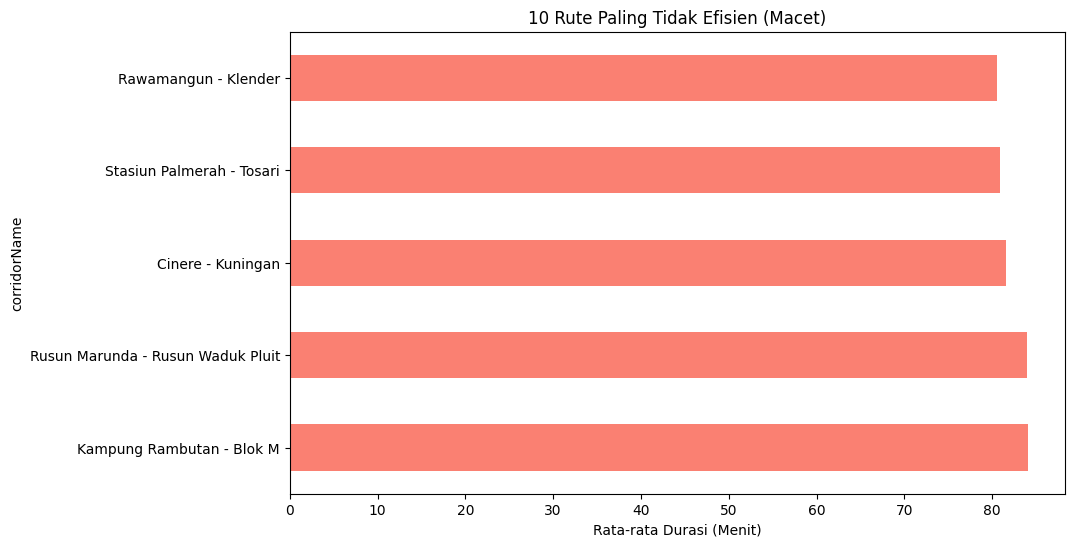

In [617]:
# Mencari 10 Koridor dengan rata-rata durasi terlama
rute_macet = df_clean.groupby('corridorName')['duration_minutes'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
rute_macet.plot(kind='barh', color='salmon')
plt.title('10 Rute Paling Tidak Efisien (Macet)')
plt.xlabel('Rata-rata Durasi (Menit)')
plt.show()

## Pertanyaan 2: Kapan waktu tersibuk (peak hour) pada rute Kampung Rambutan - Blok M berdasarkan data ini?

Total Penumpang Rute Kampung Rambutan - Blok M: 17 orang


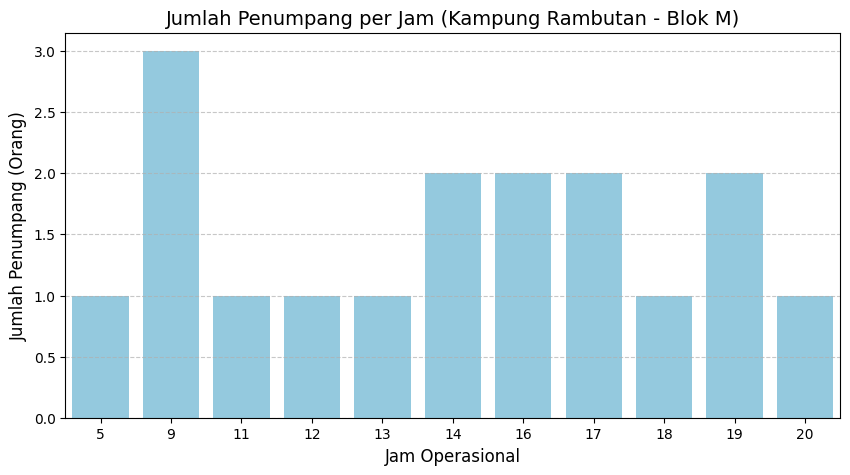

In [618]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapan Data
df = pd.read_csv('Transjakarta (1).csv')
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# 2. Filter khusus rute Kampung Rambutan - Blok M
df_bocor = df[df['corridorName'] == 'Kampung Rambutan - Blok M'].copy()

# 3. Cek Total Penumpang
total_pax = len(df_bocor)
print(f"Total Penumpang Rute Kampung Rambutan - Blok M: {total_pax} orang")

# 4. Visualisasi Sederhana (Bar Chart per Jam)
df_bocor['hour'] = df_bocor['tapInTime'].dt.hour
hourly_data = df_bocor.groupby('hour')['transID'].count().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_data, x='hour', y='transID', color='skyblue')

plt.title('Jumlah Penumpang per Jam (Kampung Rambutan - Blok M)', fontsize=14)
plt.xlabel('Jam Operasional', fontsize=12)
plt.ylabel('Jumlah Penumpang (Orang)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kita dapat analisa bahwa pada barchart tersebut bisa kita simpulkan bahwa paling 
banyak yang tap in di koridor Kampung Rambutan - Blok M pada jam puncaknya yaitu jam 9 hanya membawa 3 penumpang, pada saat jam puncak (peak) tidak begitu ramai. 

Secara rata-rata, jumlah penumpang per jam sangat rendah (berkisar antara 1 hingga 3 orang). Jika bus yang digunakan adalah bus besar yang asusminya memiliki kapasitas 60 orang, maka rute ini mengalami inefisiensi, biaya operasional seperti Bahan bakar jauh lebih besar daripada pendapatan tiket jika hanya membawa 17 penumpang.

## Pertanyaan No 3: Bagaimana posisi okupansi rute Kampung Rambutan - Blok M dibandingkan dengan rute lain yang berasal dari Terminal yang sama? ##

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\4020983369.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




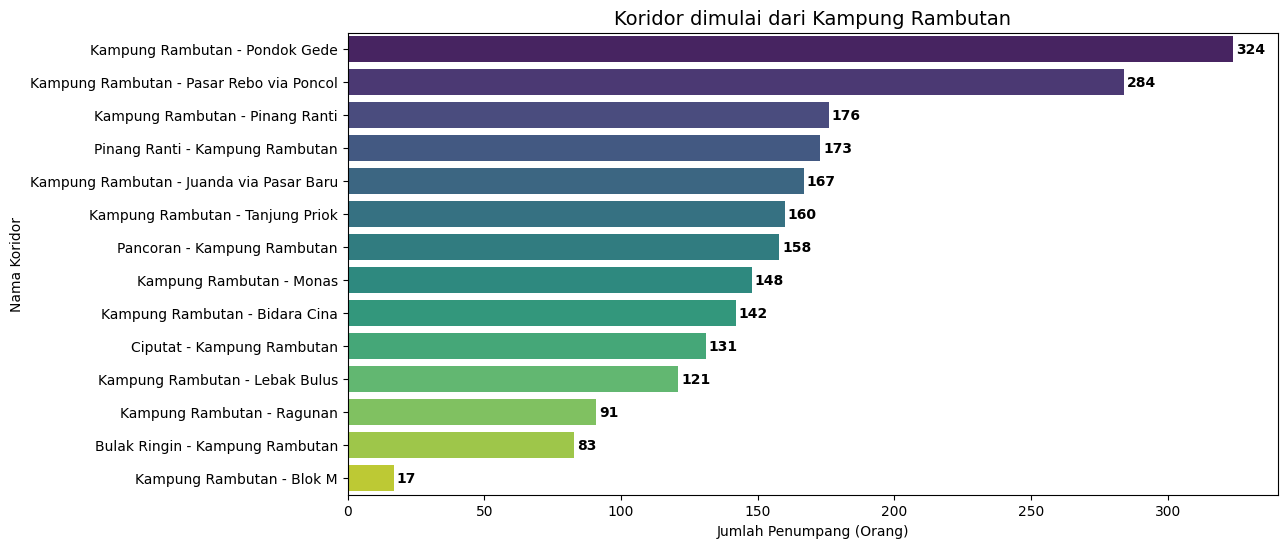

In [619]:
# Agregasi
route_pax = df_rambutan.groupby('corridorName')['transID'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=route_pax, x='transID', y='corridorName', palette='viridis')

# Tambahkan label angka
for i, v in enumerate(route_pax['transID']):
    plt.text(v + 1, i, str(int(v)), color='black', va='center', fontweight='bold')

plt.title('Koridor dimulai dari Kampung Rambutan', fontsize=14)
plt.xlabel('Jumlah Penumpang (Orang)')
plt.ylabel('Nama Koridor')
plt.show()

Rute Kampung Rambutan - Blok M berada di peringkat bawah dalam hal volume penumpang. Meskipun melayani koridor yang menghubungkan dua titik besar (Terminal dan Pusat Bisnis), jumlah transaksi tap-in hariannya jauh tertinggal dibandingkan rute pengumpan (feeder) atau rute jarak pendek lainnya dari Kampung Rambutan.

## Pertanyaan No 4: Mana rute yang secara statistik tergolong sebagai Rute yang tidak efisien (Inefficient Route)? ##

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\4113866064.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\4113866064.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\4113866064.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

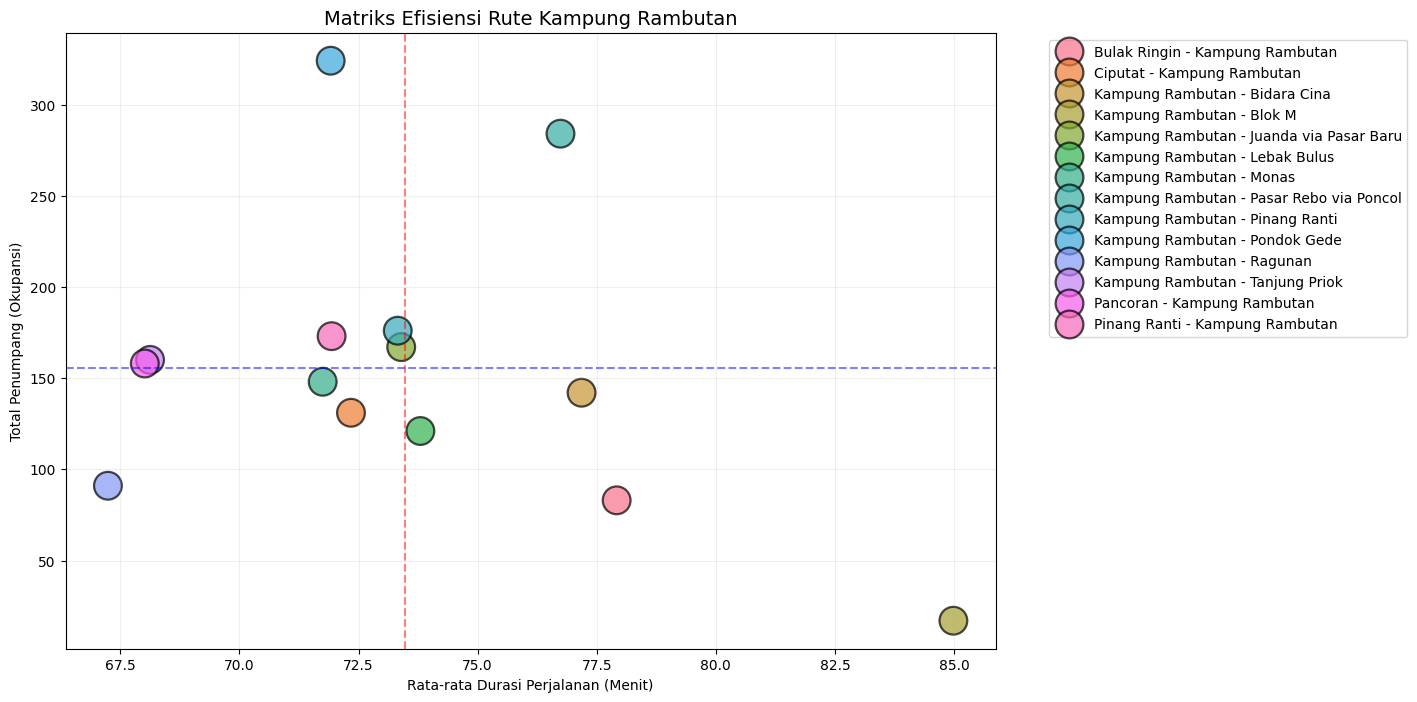

In [620]:

# 1. Pastikan kolom waktu sudah dalam format datetime
df_rambutan['tapInTime'] = pd.to_datetime(df_rambutan['tapInTime'])
df_rambutan['tapOutTime'] = pd.to_datetime(df_rambutan['tapOutTime'])

# 2. BUAT KOLOM 'duration_minutes' (Penyebab Error Sebelumnya)
df_rambutan['duration_minutes'] = (df_rambutan['tapOutTime'] - df_rambutan['tapInTime']).dt.total_seconds() / 60

# 3. Hapus data durasi yang tidak valid (misal: durasi negatif atau NaN)
df_rambutan = df_rambutan[df_rambutan['duration_minutes'] > 0]

# 4. Baru jalankan agregasi per rute
efficiency_data = df_rambutan.groupby('corridorName').agg({
    'transID': 'count',
    'duration_minutes': 'mean'
}).reset_index()

# 5. Visualisasi Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=efficiency_data, x='duration_minutes', y='transID', 
                hue='corridorName', s=400, alpha=0.7, edgecolors='black')

# Tambahkan garis rata-rata untuk membagi kuadran
plt.axvline(efficiency_data['duration_minutes'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axhline(efficiency_data['transID'].mean(), color='blue', linestyle='--', alpha=0.5)

plt.title('Matriks Efisiensi Rute Kampung Rambutan', fontsize=14)
plt.xlabel('Rata-rata Durasi Perjalanan (Menit)')
plt.ylabel('Total Penumpang (Okupansi)')
plt.grid(True, alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Dari semua koridor yang dimulai dari kampung rambutan, terdapat koridor kampung rambutan - blok M yang
rata-ratanya jauh dari rata-rata durasi perjalanan koridor yang dimulai dari kampung rambutan.

## Pertanyaan 5: Mengapa rata-rata umur penumpang menjadi faktor penentu dalam pemilihan tipe bus yang dioperasikan pada koridor Kampung Rambutan - Blok M?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\821592764.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




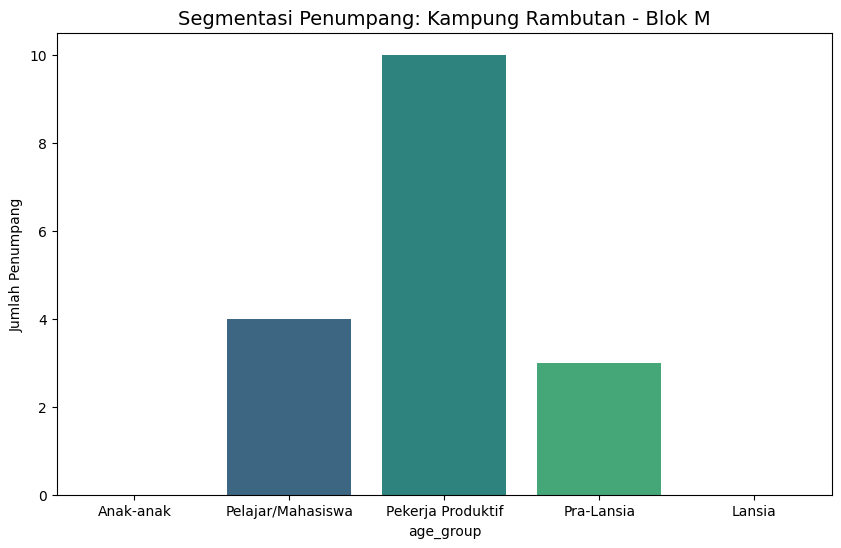

In [621]:
# 1 Tambahkan kolom 'age' ke DF UTAMA dulu
df['payCardBirthDate'] = pd.to_numeric(df['payCardBirthDate'], errors='coerce')
current_year = 2023
df['age'] = current_year - df['payCardBirthDate']

# 2. BARU BUAT df_target (sekarang 'age' otomatis ikut terbawa)
df_target = df[df['corridorName'] == 'Kampung Rambutan - Blok M'].copy()

# 3. Bersihkan data kosong di kolom age agar pd.cut tidak error
df_target = df_target.dropna(subset=['age'])

# 4. Segmentasi Kelompok Umur
bins = [0, 12, 25, 45, 60, 100]
labels = ['Anak-anak', 'Pelajar/Mahasiswa', 'Pekerja Produktif', 'Pra-Lansia', 'Lansia']
df_target['age_group'] = pd.cut(df_target['age'], bins=bins, labels=labels)

# 5. Visualisasi
plt.figure(figsize=(10, 6))
age_counts = df_target['age_group'].value_counts().reindex(labels)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

plt.title('Segmentasi Penumpang: Kampung Rambutan - Blok M', fontsize=14)
plt.ylabel('Jumlah Penumpang')
plt.show()

Pada barchart diatas, penumpang Koridor Kampung Rambutan - Blok M, didominasi Pekerja Produktif namun jumlahnya sedikit, berarti rute ini kalah saing dengan kendaraan pribadi atau ojek online Karena pada rute tersebut memiliki durasi yang sangat lama yaitu 84 menit.

Karena mayoritas pekerja yang pada umumnya berangkat pagi maka, Transjakrta perlu menawarkan  ketepatan waktu dengan mengganti Bus Transjakarta menjadi microbus untuk mencari ketepatan waktu bagi penumpang.

## KESIMPULAN ##

1. Kondisi Inefisiensi sangat tinggi
Rute ini teridentifikasi berada di Kuadran Inefisien (Durasi Lama, Okupansi Rendah). Penggunaan bus besar (kapasitas 60 orang) tidak sebanding dengan rata-rata penumpang per jam yang hanya berkisar antara 1 hingga 3 orang. Hal ini menyebabkan biaya operasional (BBM dan Kru) jauh melampaui pendapatan tiket, sehingga rute ini terus memberikan kontribusi defisit harian bagi operasional koridor Kampung 
Rambutan.

2. Celah Kosong & Kilometer Sia-sia
Ditemukan adanya "Celah Kosong" (Gap) pada beberapa titik halte di mana bus tetap menempuh jarak jauh dan berhenti, namun aktivitas penumpang (tap-in/tap-out) mendekati nol. Hal ini menciptakan Empty Miles—pemborosan bahan bakar dan waktu tanpa menghasilkan pendapatan.

3. Profil Penumpang: Dominasi Pekerja yang Sensitif Waktu
Mayoritas penumpang berada pada usia produktif (20-40 tahun). Kelompok ini sangat menghargai kecepatan. Durasi perjalanan yang tidak kompetitif menyebabkan mereka hanya menjadi  orang sekali jalan dan enggan menjadi Loyal Commuters (pulang-pergi), karena mereka cenderung beralih ke moda transportasi lain yang lebih cepat di jam pulang kerja.

* Rekomendasi 


1. Lakukan "Right-Sizing" armada secara agresif pada jam-jam off-peak (pukul 10.00 – 15.00). Gunakan armada Mikrotrans atau Bus Medium untuk menggantikan bus besar guna meningkatkan load factor  menjadi angka yang lebih efisien.
Saran Tambahan: Akan lebih baik jika kita bisa menguji coba skema ini selama 2 minggu untuk melihat apakah penurunan biaya BBM sebanding dengan tingkat kenyamanan penumpang.

2. Terapkan Layanan Ekspres dengan sistem "Skip-Stop" pada halte-halte berproduktivitas rendah. Berdasarkan data stop sequence, lewati halte yang memiliki aktivitas tap-in/tap-out di bawah ambang batas (misal <5 orang/hari) untuk memangkas durasi perjalanan.

3. Prioritaskan ketersediaan armada pada jendela waktu Peak Hour (06.00-09.00 & 16.00-19.00). Pastikan headway (waktu tunggu) tidak lebih dari 10 menit pada jam tersebut untuk menjaga loyalitas Commuter (penumpang PP).

Dampak yang Diharapkan
Dengan mempersempit operasional bus besar hanya pada waktu dan titik yang produktif, diharapkan analisis ini membantu perusahaan untuk:

1. Mengurangi Defisit: Menekan biaya variabel (BBM & Maintenance) secara signifikan.

2. Meningkatkan Okupansi: Memastikan setiap kilometer yang ditempuh bus membawa jumlah penumpang yang optimal.

3. Efisiensi Waktu: Meningkatkan kecepatan komersial bus, yang pada akhirnya meningkatkan kualitas 


In [ ]:
df_target.to_excel('Analisis_Rambutan_BlokM_Cleaned.xlsx', index=False)